In [ ]:
import tensorflow as tf
print(tf.__version__)

# The Keras functional API

 ## Coding tutorials
 #### [1. Multiple inputs and outputs](#coding_tutorial_1)
 #### [2. Tensors and Variables](#coding_tutorial_2)
 #### [3. Accessing model layers](#coding_tutorial_3)
 #### [4. Freezing layers](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Multiple inputs and outputs

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the acute inflammations dataset

The `acute inflammations` was created by a medical expert as a data set to test the expert system, which will perform the presumptive diagnosis of two diseases of the urinary system. You can find out more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations).

Attribute information:

Inputs:
- Temperature of patient : 35C-42C
- Occurrence of nausea : yes/no
- Lumbar pain : yes/no
- Urine pushing (continuous need for urination) : yes/no
- Micturition pains : yes/no
- Burning of urethra, itch, swelling of urethra outlet : yes/no

Outputs:
- decision 1: Inflammation of urinary bladder : yes/no
- decision 2: Nephritis of renal pelvis origin : yes/no

#### Import the data

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=1CDPQSqpI7OjNIgOERWaI-BlQMI6vjzb9

You should store this file in Drive for use in this Colab notebook.

#### Load the data

In [36]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Load the dataset

from sklearn.model_selection import train_test_split

pd_dat = pd.read_csv('path/to/diagnosis.csv')
dataset = pd_dat.values

In [ ]:
# Build train and test data splits

X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,:6], dataset[:,6:], test_size=0.33)

In [ ]:
# Assign training and testing inputs/outputs

temp_train, nocc_train, lumbp_train, up_train, mict_train, bis_train = np.transpose(X_train)
temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test = np.transpose(X_test)

inflam_train, nephr_train = Y_train[:, 0], Y_train[:, 1]
inflam_test, nephr_test = Y_test[:, 0], Y_test[:, 1]

#### Build the model

In [ ]:
# Build the input layers

from tensorflow.keras import Input, layers

shape_inputs = (1,)
temperature = Input(shape=shape_inputs, name='temp')
nausea_occurence = Input(shape=shape_inputs, name='nocc')
lumbar_pain = Input(shape=shape_inputs, name='lumbp')
urine_pushing = Input(shape=shape_inputs, name='up')
micturition_pains = Input(shape=shape_inputs, name='mict')
bis = Input(shape=shape_inputs, name='bis')

In [ ]:
# Create a list of all the inputs

list_inputs = [temperature, nausea_occurence, lumbar_pain, urine_pushing, 
               micturition_pains, bis]

In [ ]:
# Merge all input features into a single large vector

x = layers.concatenate(list_inputs)

In [ ]:
# Use a logistic regression classifier for disease prediction

inflammation_pred = layers.Dense(1, activation='sigmoid', name='inflam')(x)
nephritis_pred = layers.Dense(1, activation='sigmoid', name='nephr')(x)

In [ ]:
# Create a list of all the outputs

list_outputs = [inflammation_pred, nephritis_pred]

In [ ]:
# Create the model object

model = tf.keras.Model(inputs=list_inputs, outputs=list_outputs)

#### Plot the model

In [ ]:
# Display the multiple input/output model

tf.keras.utils.plot_model(model, 'multi_input_output_model.png', show_shapes=True)

#### Compile the model

In [ ]:
# Compile the model

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(1e-3),
    loss={'inflam': 'binary_crossentropy', 'nephr': 'binary_crossentropy'},
    metrics={'inflam': ['acc'], 'nephr': ['acc']},
    loss_weights=[1., 0.2]
)

#### Fit the model 

In [ ]:
# Define training inputs and outputs

inputs_train = {'temp': temp_train, 'nocc': nocc_train, 'lumbp': lumbp_train,
                'up': up_train, 'mict': mict_train, 'bis': bis_train}

outputs_train = {'inflam': inflam_train, 'nephr': nephr_train}

In [ ]:
# Train the model

history = model.fit(inputs_train, outputs_train,
                    epochs=1000,
                    batch_size=128,
                    verbose=False
)

#### Plot the learning curves

In [ ]:
# Plot the training accuracy

acc_keys = [k for k in history.history.keys() if k in ('inflam_acc', 'nephr_acc')] 
loss_keys = [k for k in history.history.keys() if not k in acc_keys]

for k, v in history.history.items():
    if k in acc_keys:
        plt.figure(1)
        plt.plot(v)
    else:
        plt.figure(2)
        plt.plot(v)

plt.figure(1)
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(acc_keys, loc='upper right')

plt.figure(2)
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loss_keys, loc='upper right')

plt.show()

In [ ]:
# Evaluate the model

model.evaluate([temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test],
               [inflam_test, nephr_test],
               verbose=2
)

***
<a id="coding_tutorial_2"></a>
## Tensors and Variables

In [ ]:
import numpy as np

#### Create Variable objects

In [ ]:
# Create Variable objects of different type with tf.Variable

strings = tf.Variable(["Hello world!"], tf.string)
floats  = tf.Variable([3.14159, 2.71828], tf.float64)
ints = tf.Variable([1, 2, 3], tf.int32)
complexs = tf.Variable([25.9 - 7.39j, 1.23 - 4.91j], tf.complex128)

In [ ]:
# Initialise a Variable value

tf.Variable(tf.constant(4.2, shape=(3, 3)))

#### Use and modify Variable values

In [ ]:
# Use the value of a Variable

v = tf.Variable(0.0)
w = v + 1  # w is a tf.Tensor which is computed based on the value of v.

print(type(w))

In [ ]:
# Increment the value of a Variable

v.assign_add(1)
print(v)

In [ ]:
# Decrement the value of a Variable

v.assign_sub(1)
print(v)

#### Create Tensor objects

Create a constant tensor and print its type as well as its shape:

In [ ]:
# Create a constant Tensor

x = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(x)
print("dtype:", x.dtype)
print("shape:", x.shape)

In [ ]:
# Obtain the value as a numpy array

x.numpy()

In [ ]:
# Create a Tensor of type float32

x = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=tf.float32)
print(x)

In [ ]:
# Create coefficients

coeffs = np.arange(16)
print(coeffs)

In [ ]:
# Initialise shapes

shape1 = [8, 2]
shape2 = [4, 4]
shape3 = [2, 2, 2, 2]

In [ ]:
# Create Tensors of different shape

a = tf.constant(coeffs, shape=shape1)
print("\n a:\n ", a)

b = tf.constant(coeffs, shape=shape2)
print("\n b:\n ", b)

c = tf.constant(coeffs, shape=shape3)
print("\n c:\n ", c)

#### Useful Tensor operations

In [ ]:
# Create a constant Tensor

t = tf.constant(np.arange(80), shape=[5,2,8])

In [ ]:
# Get the rank of a Tensor

rank = tf.rank(t)

In [ ]:
# Display the rank

print("rank: ", rank)

In [ ]:
# Reshape a Tensor

t2 = tf.reshape(t, [8, 10])

In [ ]:
# Display the new shape

print("t2.shape: ", t2.shape)

In [ ]:
# Create ones, zeros, identity and constant Tensors

ones = tf.ones(shape=(2, 3))
zeros = tf.zeros(shape=(2, 4))
eye = tf.eye(3)
tensor7 = tf.constant(7., shape=(2, 2))

In [ ]:
# Display the created tensors

print("\n Ones:\n ", ones)
print("\n Zeros:\n ", zeros)
print("\n Identity:\n ", eye)
print("\n Tensor filled with 7: ", tensor7)

In [ ]:
# Create a ones Tensor and a zeros Tensor

t1 = tf.ones(shape=(2, 2))
t2 = tf.zeros(shape=(2, 2))

In [ ]:
# Concatentate two Tensors

concat0 = tf.concat([t1, t2], 0)
concat1 = tf.concat([t1, t2], 1)

In [ ]:
# Display the concatenated tensors

print(concat0)
print(concat1)

In [ ]:
# Create a constant Tensor

t = tf.constant(np.arange(24), shape=(3, 2, 4))
print("\n t shape: ", t.shape)

In [ ]:
# Expanding the rank of Tensors

t1 = tf.expand_dims(t, 0)
t2 = tf.expand_dims(t, 1)
t3 = tf.expand_dims(t, 3)

In [ ]:
# Display the shapes after tf.expand_dims

print("\n After expanding dims:\n t1 shape: ", t1.shape, "\n t2 shape: ", t2.shape, "\n t3 shape: ", t3.shape)

In [ ]:
# Squeezing redundant dimensions

t1 = tf.squeeze(t1)
t2 = tf.squeeze(t2)
t3 = tf.squeeze(t3)

In [ ]:
# Display the shapes after tf.squeeze

print("\n After squeezing:\n t1 shape: ", t1.shape, "\n t2 shape: ", t2.shape, "\n t3 shape: ", t3.shape)

In [ ]:
# Slicing a Tensor

x = tf.constant(np.arange(8))
print(x)
print(x[1:-3])

#### Doing maths with Tensors

In [ ]:
# Create two constant Tensors

c = tf.constant([[1.0, 2.0], [3.0, 4.0]])
d = tf.constant([[1.0, 1.0], [0.0, 1.0]])

In [ ]:
# Matrix multiplication

matmul_cd = tf.matmul(c, d)

In [ ]:
# Display the result

print("\n tf.matmul(c,d):\n", matmul_cd)

In [ ]:
# Elementwise operations

c_times_d = c * d
c_plus_d = c + d
c_minus_d = c - d
c_div_c = c / c

In [ ]:
# Display the results

print("\n c*d:\n", c_times_d)
print("\n c+d:\n", c_plus_d)
print("\n c-d:\n", c_minus_d)
print("\n c/c:\n", c_div_c)

In [ ]:
# Create Tensors

a = tf.constant([[2, 3], [3, 3]])
b = tf.constant([[8, 7], [2, 3]])
x = tf.constant([[-6.89 + 1.78j], [-2.54 + 2.15j]])

In [ ]:
# Absolute value of a Tensor

absx = tf.abs(x)

In [ ]:
# Power of a Tensor

powaa = tf.pow(a, a)

In [ ]:
# Display the results

print("\n ", absx)
print("\n ", powaa)

#### Randomly sampled constant tensors

In [ ]:
# Create a Tensor with samples from a Normal distribution

tn = tf.random.normal(shape=(2, 2), mean=0, stddev=1.)
print(tn)

In [ ]:
# Create a Tensor with samples from a Uniform distribution

tu = tf.random.uniform(shape=(2, 1), minval=0, maxval=10, dtype='int32')
print(tu)

In [ ]:
# Create a Tensor with samples from a Poisson distribution

tp = tf.random.poisson((2, 2), 5)
print(tp)

In [ ]:
# More maths operations

d = tf.square(tn)
e = tf.exp(d)
f = tf.cos(c

## From videos

In [13]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv1D, AveragePooling1D

In [3]:
inputs = Input(shape=(32, 1), name='input_layer')
h = Conv1D(3, 5, activation='relu', name='conv1d_layer')(inputs)
h = AveragePooling1D(3, name='avg_pool1d_layer')(h)
h = Flatten(name='flatten_layer')(h)
outputs = Dense(1, activation='sigmoid', name='dense_layer')(h)

In [4]:
model = Model(inputs=inputs, outputs=outputs)

In [5]:
flatten_output = model.get_layer('flatten_layer').output

In [6]:
inputs

<tf.Tensor 'input_layer:0' shape=(None, 32, 1) dtype=float32>

In [7]:
model.input

<tf.Tensor 'input_layer:0' shape=(None, 32, 1) dtype=float32>

In [8]:
flatten_output

<tf.Tensor 'flatten_layer/Reshape:0' shape=(None, 27) dtype=float32>

In [9]:
model.get_layer('flatten_layer')

In [12]:
model2 = Model(inputs=model.input, outputs=flatten_output)

In [14]:
model3 = Sequential([
                     model2,
                     Dense(10, activation='softmax', name='new_dense_layer')
])

In [16]:
new_outputs = Dense(10, activation='softmax')(model2.output)

In [17]:
model3_2 = Model(inputs=model2.input, outputs=new_outputs)

***
<a id="coding_tutorial_3"></a>
## Accessing model layers

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the pre-trained model

In this section, we aim to demonstrate accessing layer attributes within a model.

Let's get started by loading the `VGG19` pre-trained model from the `keras.applications` library, which is a very deep network trained on more than a million images from the ImageNet database. The network is trained to classify images into 1000 object categories.

In [19]:
# Load the VGG19 model

from tensorflow.keras.applications import VGG19

vgg_model  =VGG19()

574717952/574710816 [==============================] - 10s 0us/step


In [20]:
# Get the inputs, layers and display the summary

vgg_input = vgg_model.input
vgg_layers = vgg_model.layers
vgg_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [21]:
print(vgg_input)

Tensor("input_1:0", shape=(None, 224, 224, 3), dtype=float32)


#### Build a model to access the layer outputs

In [22]:
from tensorflow.keras.models import Model

In [23]:
# Build a model that returns the layer outputs

layer_outputs = [layer.output for layer in vgg_layers]
print(layer_outputs)

[<tf.Tensor 'input_1:0' shape=(None, 224, 224, 3) dtype=float32>, <tf.Tensor 'block1_conv1/Relu:0' shape=(None, 224, 224, 64) dtype=float32>, <tf.Tensor 'block1_conv2/Relu:0' shape=(None, 224, 224, 64) dtype=float32>, <tf.Tensor 'block1_pool/MaxPool:0' shape=(None, 112, 112, 64) dtype=float32>, <tf.Tensor 'block2_conv1/Relu:0' shape=(None, 112, 112, 128) dtype=float32>, <tf.Tensor 'block2_conv2/Relu:0' shape=(None, 112, 112, 128) dtype=float32>, <tf.Tensor 'block2_pool/MaxPool:0' shape=(None, 56, 56, 128) dtype=float32>, <tf.Tensor 'block3_conv1/Relu:0' shape=(None, 56, 56, 256) dtype=float32>, <tf.Tensor 'block3_conv2/Relu:0' shape=(None, 56, 56, 256) dtype=float32>, <tf.Tensor 'block3_conv3/Relu:0' shape=(None, 56, 56, 256) dtype=float32>, <tf.Tensor 'block3_conv4/Relu:0' shape=(None, 56, 56, 256) dtype=float32>, <tf.Tensor 'block3_pool/MaxPool:0' shape=(None, 28, 28, 256) dtype=float32>, <tf.Tensor 'block4_conv1/Relu:0' shape=(None, 28, 28, 512) dtype=float32>, <tf.Tensor 'block4_co

In [24]:
features = Model(inputs=vgg_input, outputs=layer_outputs)
print(features)

In [32]:
len(layer_outputs)

26

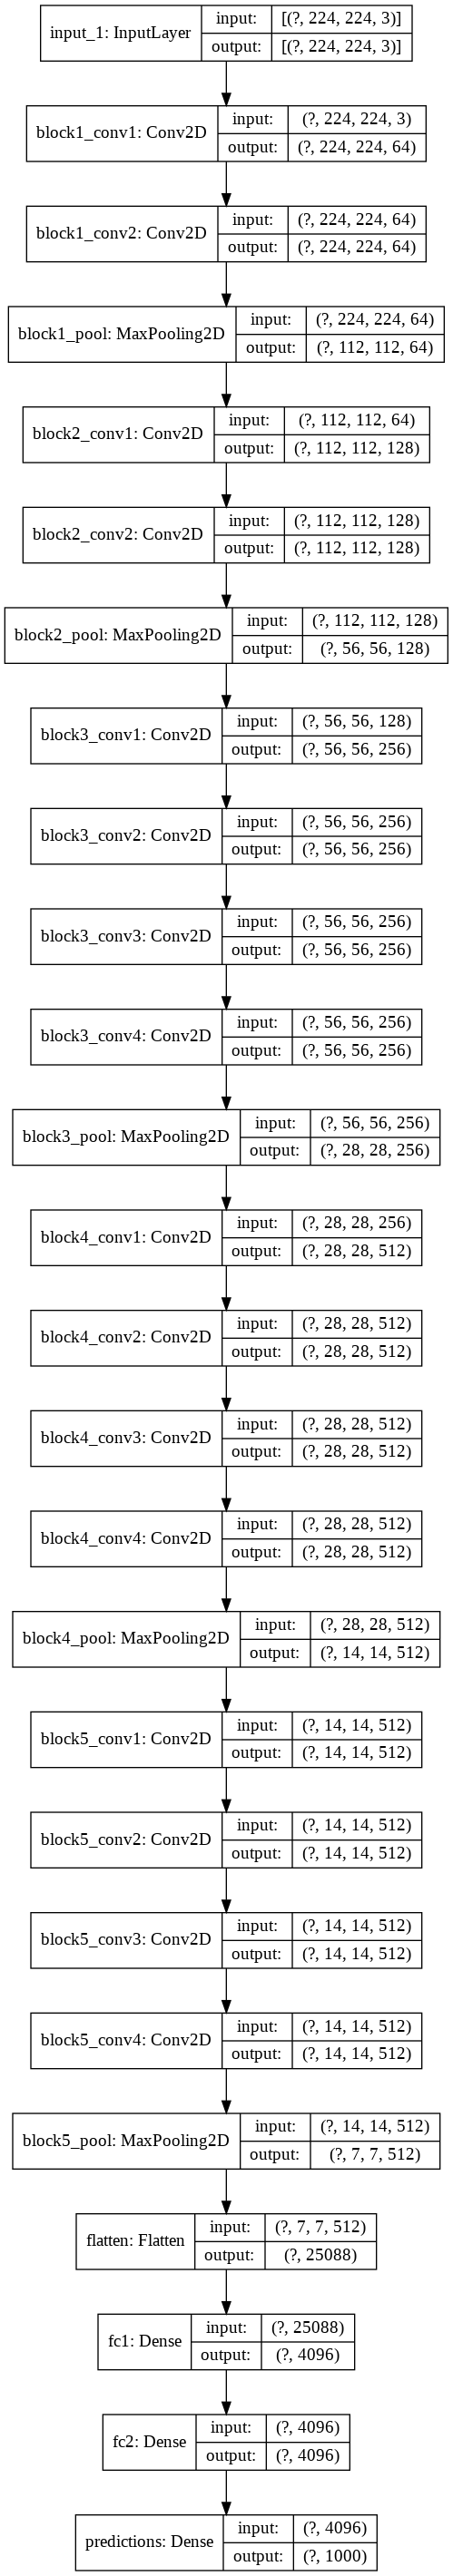

In [27]:
# Plot the model
import tensorflow as tf

tf.keras.utils.plot_model(features, 'vgg19_model.png', show_shapes=True)

In [28]:
print(type(np.random.random((1, 224, 224, 3))))
print(type(np.random.random((1, 224, 224, 3)).astype('float32')))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [29]:
# Test the model on a random input

img = np.random.random((1, 224, 224, 3))

In [30]:
extracted_features = features(img)
print(type(extracted_features))

<class 'list'>


In [33]:
extracted_features2 = features.predict(img)
print(type(extracted_features2))

<class 'list'>


In [34]:
print(len(extracted_features), len(extracted_features2))

26 26


#### Load the 'cool cat' picture

In Zambia’s South Luangwa National Park, a photographer had been watching a pride of lions while they slept off a feast from a buffalo kill. When this female walked away, he anticipated that she might be going for a drink and so he positioned his vehicle on the opposite side of the waterhole. The `cool cat` picture is one of the highly commended 2018 Image from Wildlife Photographer of the Year.

#### Import the picture

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=1myXpP8QFvhATqg0bPYhCpVS48_OgAC0L

You should store this file in Drive for use in this Colab notebook.

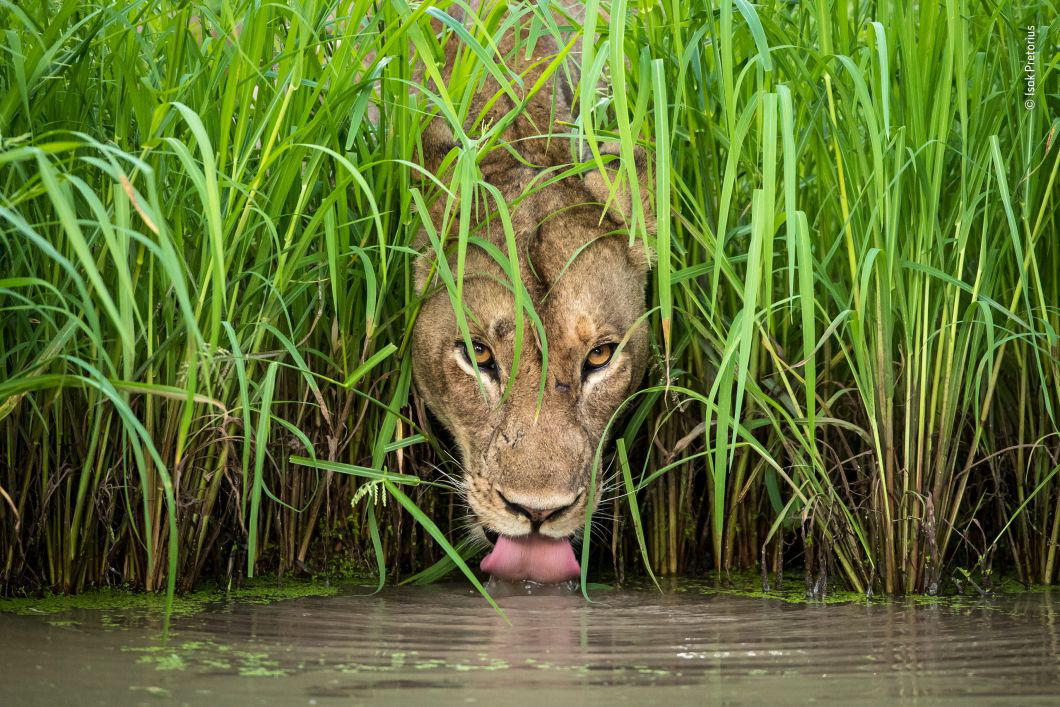

In [37]:
# Display the original image

import IPython.display as display
from PIL import Image

display.display(Image.open('gdrive//MyDrive/Colab Notebooks/data/cool_cat.jpg'))

#### Visualise network features from the input image

In [38]:
# Preprocess the image

from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image

img_path = 'gdrive//MyDrive/Colab Notebooks/data/cool_cat.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)
x = preprocess_input(x)
print(x.shape)

(224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)


In [39]:
# Extract the features

extracted_features = features(x)
print(len(extracted_features))

26


In [41]:
# Visualise the input channels

f1 = extracted_features[0]
print('f1.shape:{}'.format(f1.shape))

f1.shape:(1, 224, 224, 3)


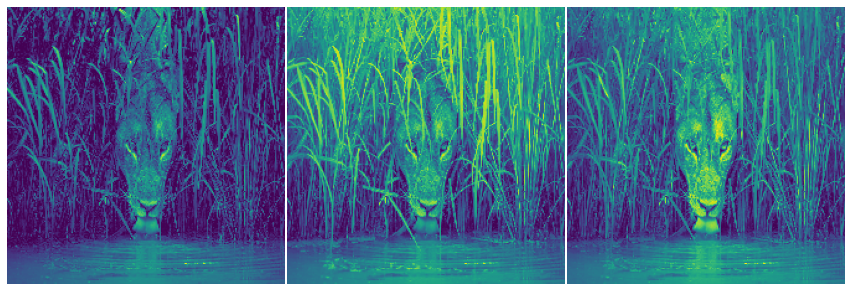

In [46]:
imgs = f1[0, :, :]
plt.figure(figsize=(15, 15))
for n in range(3):
  ax = plt.subplot(1, 3, n+1)
  plt.imshow(imgs[:, :, n])
  plt.axis('off')
plt.subplots_adjust(wspace=0.01, hspace=0.01)

In [47]:
f2 = extracted_features[1]
print('f2.shape:{}'.format(f2.shape))

f2.shape:(1, 224, 224, 64)


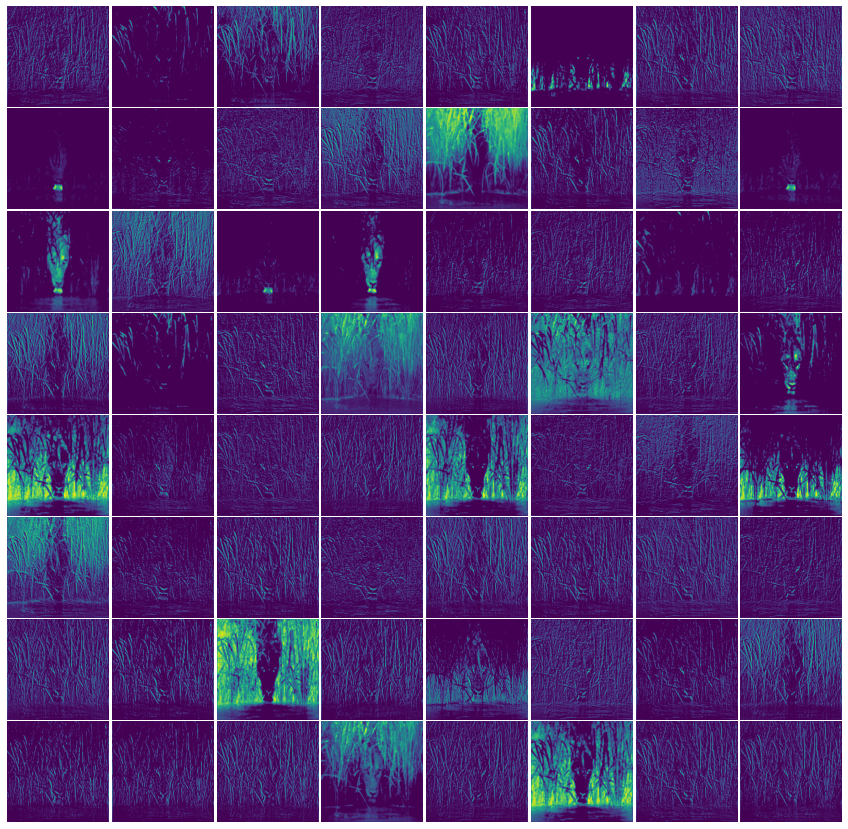

In [49]:
# Visualise some features in the first hidden layer

imgs = f2[0, :, :]
plt.figure(figsize=(15, 15))
for n in range(64):
  ax = plt.subplot(8, 8, n+1)
  plt.imshow(imgs[:, :, n])
  plt.axis('off')
plt.subplots_adjust(wspace=0.01, hspace=0.01)

In [50]:
# Build a model to extract features by layer name

extracted_features_block1_pool = Model(inputs=features.inputs, outputs=features.get_layer('block1_pool').output)
block1_pool_features = extracted_features_block1_pool.predict(x)

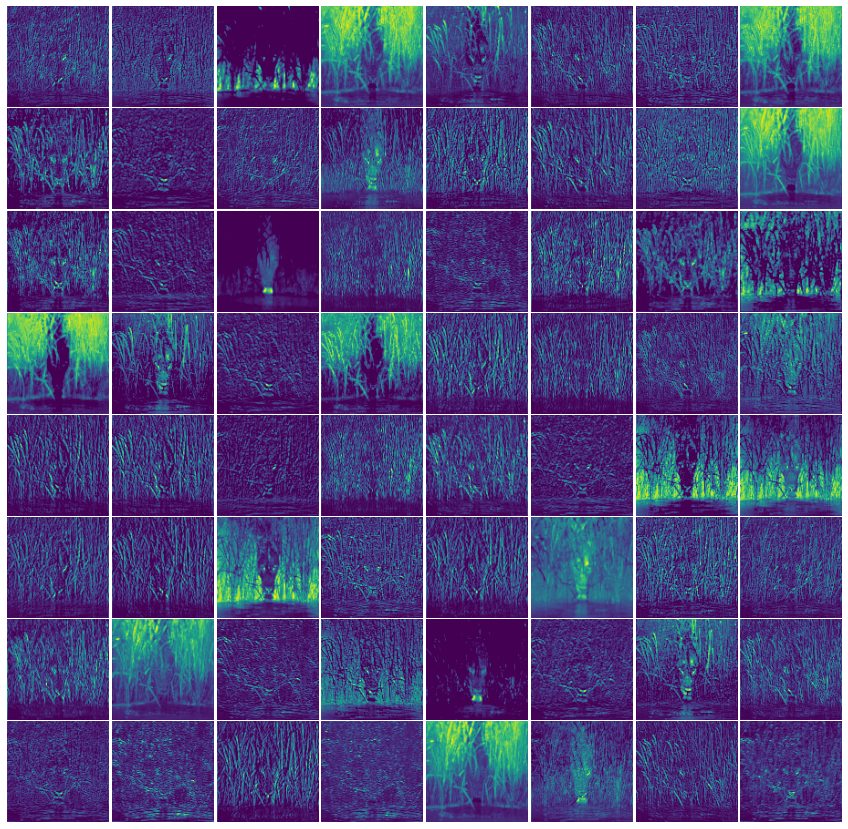

In [51]:
# Visualise some features from the extracted layer output

imgs = block1_pool_features[0, :, :]
plt.figure(figsize=(15, 15))
for n in range(64):
  ax = plt.subplot(8, 8, n+1)
  plt.imshow(imgs[:, :, n])
  plt.axis('off')
plt.subplots_adjust(wspace=0.01, hspace=0.01)

In [52]:
extracted_features_block1_pool_2 = Model(inputs=features.inputs, outputs=features.get_layer('block1_pool').output)
block1_pool_features_2 = extracted_features_block1_pool_2(x)

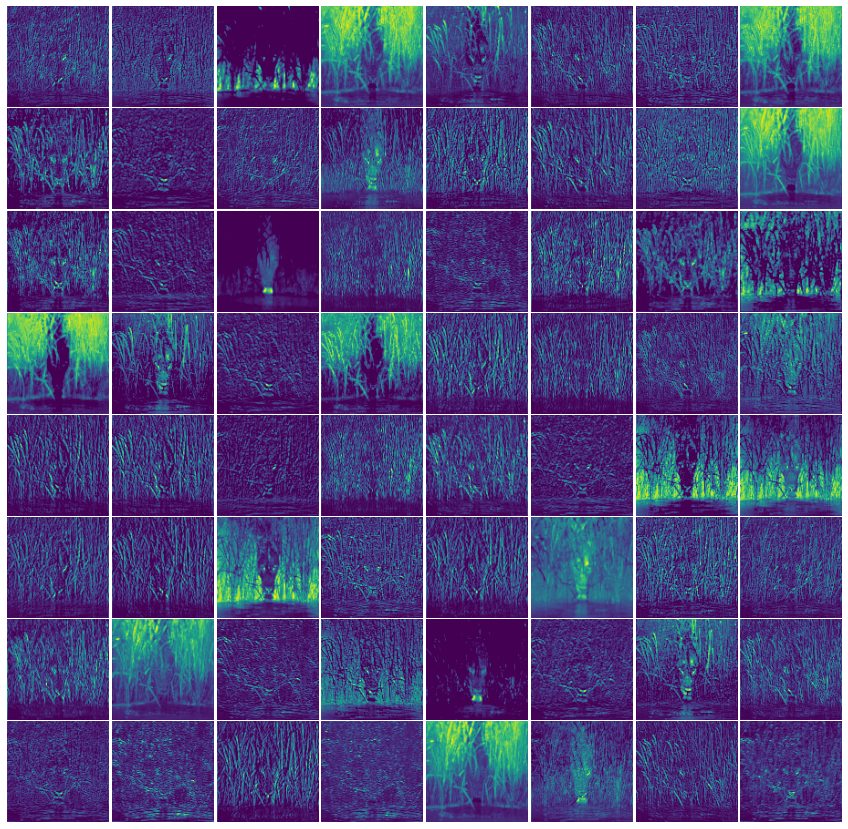

In [53]:
imgs = block1_pool_features_2[0, :, :]
plt.figure(figsize=(15, 15))
for n in range(64):
  ax = plt.subplot(8, 8, n+1)
  plt.imshow(imgs[:, :, n])
  plt.axis('off')
plt.subplots_adjust(wspace=0.01, hspace=0.01)

In [54]:
# Extract features from a layer deeper in the network

extracted_features_block5_conv4 = Model(inputs=features.inputs, outputs=features.get_layer('block5_conv4').output)
block5_conv4_features = extracted_features_block5_conv4.predict(x)

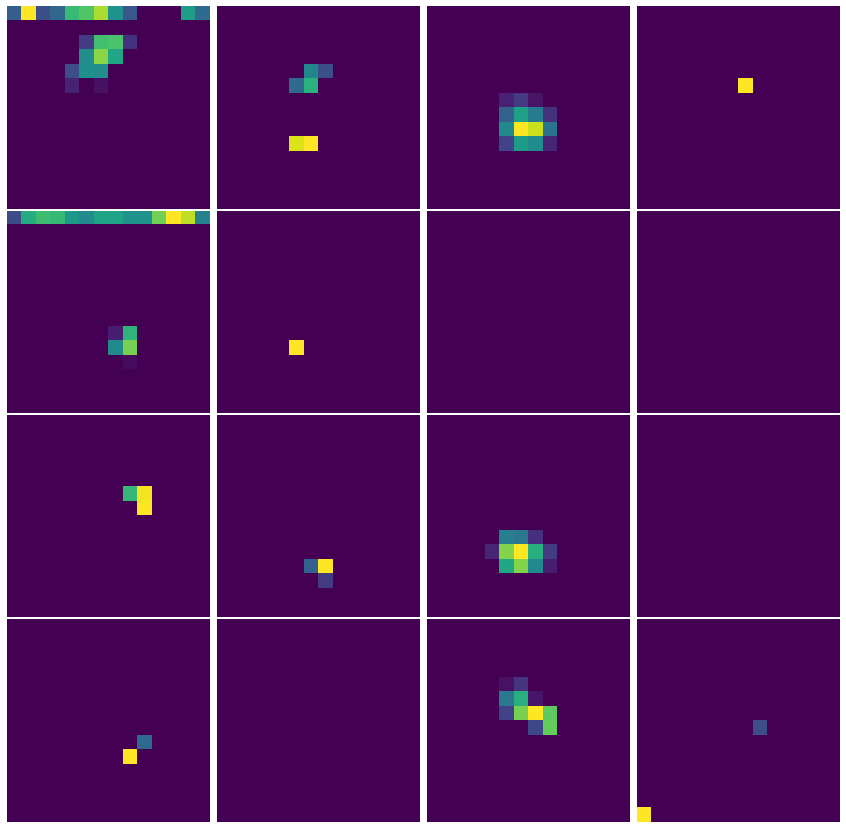

In [55]:
# Visualise some features from the extracted layer output

imgs = block5_conv4_features[0, :, :]
plt.figure(figsize=(15, 15))
for n in range(16):
  ax = plt.subplot(4, 4, n+1)
  plt.imshow(imgs[:, :, n])
  plt.axis('off')
plt.subplots_adjust(wspace=0.01, hspace=0.01)

***
<a id="coding_tutorial_4"></a>
## Freezing layers

In [56]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Build the model

In [66]:
# Build a small Sequential model

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', kernel_initializer='random_uniform',
                 bias_initializer='ones'),
    layers.Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones'),
    layers.Dense(4, activation='softmax'),
])

In [67]:
# Display the model summary

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 12        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


#### Examine the weight matrix variation over training

In [68]:
# Retrieve the weights and biases

W0_layers = [e.weights[0].numpy() for e in model.layers]
b0_layers = [e.bias.numpy() for e in model.layers]

In [69]:
W0_layers

[array([[ 0.00626697,  0.02007404,  0.00775131,  0.04528071],
        [ 0.02611193, -0.00267059,  0.04636672,  0.02498783],
        [ 0.01841177,  0.03102982,  0.0457637 ,  0.01378149],
        [-0.03580882, -0.02474766,  0.04836644,  0.02933835]],
       dtype=float32), array([[-0.24951814, -0.17773598],
        [-0.15796944, -0.5045399 ],
        [ 0.8340683 ,  0.7423073 ],
        [ 0.07397049,  0.0234121 ]], dtype=float32), array([[-0.5180681 ,  0.18375587,  0.36341095,  0.54715157],
        [ 0.43109083, -0.3084936 ,  0.48468924, -0.16681337]],
       dtype=float32)]

In [70]:
b0_layers

[array([1., 1., 1., 1.], dtype=float32),
 array([1., 1.], dtype=float32),
 array([0., 0., 0., 0.], dtype=float32)]

In [71]:
# Construct a synthetic dataset

x_train = np.random.random((100, 4))
y_train = x_train

x_test = np.random.random((20, 4))
y_test = x_test

In [72]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [73]:
# Retrieve weights and biases

W1_layers = [e.weights[0].numpy() for e in model.layers]
b1_layers = [e.bias.numpy() for e in model.layers]

Layer 0: bias variation:  0.17281821
Layer 1: bias variation:  0.122212686
Layer 2: bias variation:  0.18122512


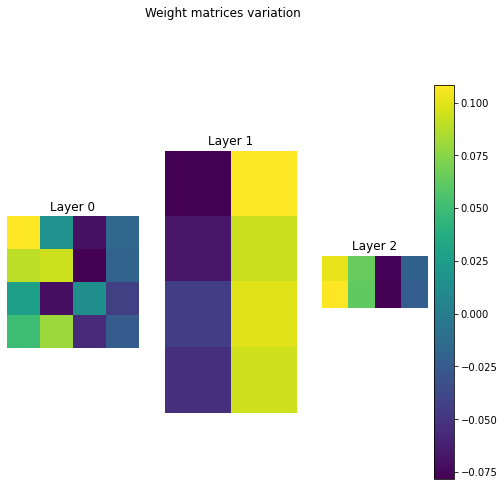

In [74]:
# Plot the variation

plt.figure(figsize=(8,8))
for n in range(3):
    delta_l = W1_layers[n] - W0_layers[n]
    print('Layer '+str(n)+': bias variation: ', np.linalg.norm(b1_layers[n] - b0_layers[n]))
    ax = plt.subplot(1,3,n+1)
    plt.imshow(delta_l)
    plt.title('Layer '+str(n))
    plt.axis('off')
plt.colorbar()
plt.suptitle('Weight matrices variation');

In [78]:
def get_weights(model):
  return [e.weights[0].numpy() for e in model.layers]

def get_bias(model):
  return [e.bias.numpy() for e in model.layers]

def plot_delta_weights(W0_layers, W1_layers, b0_layers, b1_layers):
  plt.figure(figsize=(8,8))
  for n in range(3):
      delta_l = W1_layers[n] - W0_layers[n]
      print('Layer '+str(n)+': bias variation: ', np.linalg.norm(b1_layers[n] - b0_layers[n]))
      ax = plt.subplot(1,3,n+1)
      plt.imshow(delta_l)
      plt.title('Layer '+str(n))
      plt.axis('off')
  plt.colorbar()
  plt.suptitle('Weight matrices variation');

Layer 0: bias variation:  0.17281821
Layer 1: bias variation:  0.122212686
Layer 2: bias variation:  0.18122512


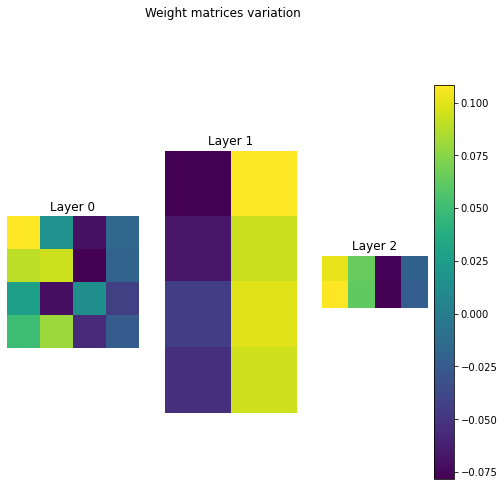

In [79]:
plot_delta_weights(W0_layers, W1_layers, b0_layers, b1_layers)

#### Freeze layers at build time

In [80]:
# Count the trainable and non trainable variables before the freezing

n_trainable_variables = len(model.trainable_variables)
n_non_trainable_variables = len(model.non_trainable_variables)

In [81]:
# Display the number of trainable and non trainable variables before the freezing

print("\n Before freezing:\n\t Number of trainable variables: ", n_trainable_variables,
                         "\n\t Number of non trainable variables: ", n_non_trainable_variables)


 Before freezing:
	 Number of trainable variables:  6 
	 Number of non trainable variables:  0


In [82]:
# Build the model

model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', kernel_initializer='random_uniform',
                 bias_initializer='ones', trainable=False),
    layers.Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones'),
    layers.Dense(4, activation='softmax'),
])

In [83]:
# Count the trainable and non trainable variables after the freezing

n_trainable_variables = len(model.trainable_variables)
n_non_trainable_variables = len(model.non_trainable_variables)

In [84]:
# Display the number of trainable and non trainable variables after the freezing

print("\n After freezing:\n\t Number of trainable variables: ", n_trainable_variables,
                         "\n\t Number of non trainable variables: ", n_non_trainable_variables)


 After freezing:
	 Number of trainable variables:  4 
	 Number of non trainable variables:  2


In [85]:
# Retrieve weights and biases

W0_layers = get_weights(model)
b0_layers = get_bias(model)

In [86]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [87]:
# Retrieve weights and biases

W1_layers = get_weights(model)
b1_layers = get_bias(model)

Layer 0: bias variation:  0.0
Layer 1: bias variation:  0.16600728
Layer 2: bias variation:  0.2483338


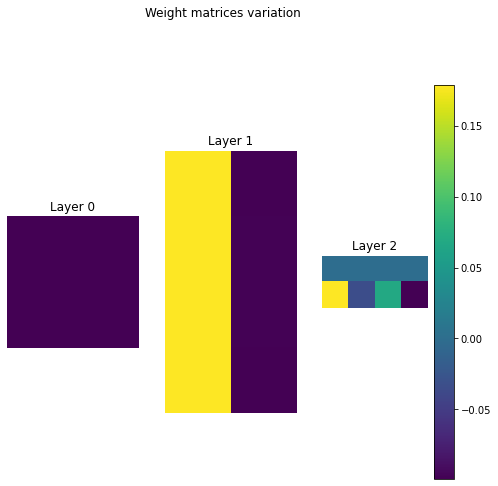

In [88]:
# Plot the variation

plot_delta_weights(W0_layers, W1_layers, b0_layers, b1_layers)

#### Freeze layers of a pre-built model

In [89]:
# Count the trainable and non trainable variables before the freezing

print("\n Before freezing:\n\t Number of trainable variables: ", len(model.trainable_variables),
                         "\n\t Number of non trainable variables: ", len(model.non_trainable_variables))


 Before freezing:
	 Number of trainable variables:  4 
	 Number of non trainable variables:  2


In [90]:
# Freeze the second layer

model.layers[1].trainable = False

In [91]:
# Count the trainable and non trainable variables after the freezing

print("\n After freezing:\n\t Number of trainable variables: ", len(model.trainable_variables),
                        "\n\t Number of non trainable variables: ", len(model.non_trainable_variables))


 After freezing:
	 Number of trainable variables:  2 
	 Number of non trainable variables:  4


In [92]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [94]:
# Retrieve weights and biases

W2_layers = get_weights(model)
b2_layers = get_bias(model)

Layer 0: bias variation:  0.0
Layer 1: bias variation:  0.0
Layer 2: bias variation:  0.18396856


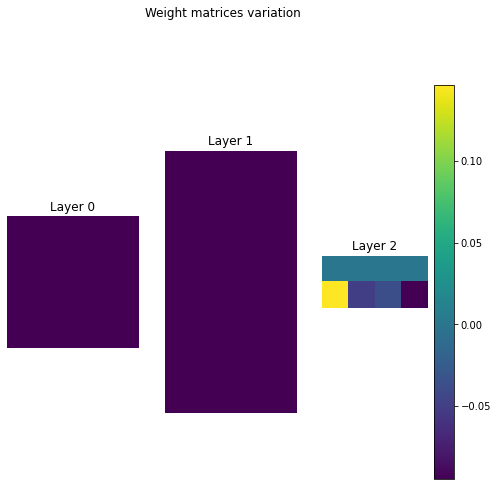

In [95]:
# Plot the variation

plot_delta_weights(W1_layers, W2_layers, b1_layers, b2_layers)